In [56]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# URL of the AnTuTu benchmark scores page
url = 'https://www.antutu.com/en/ranking/soc0.htm'

In [15]:
# Send an HTTP request to the URL
response = requests.get(url)
response

<Response [200]>

In [16]:
soup = BeautifulSoup(response.text, 'html.parser')

In [29]:
# Find the div with the class "m_l fl"
div = soup.find('div', class_='m_l fl')

# List to hold all items
all_items = []

if div:
    # Find all unordered lists with class "list-unstyled newrank-b" within the div
    uls = div.find_all('ul', class_='list-unstyled newrank-b')

    for ul in uls:
        # Extract list items
        items = []
        for li in ul.find_all('li'):
            items.append(li.text.strip())
        
        # Append items to the main list
        all_items.extend(items)
else:
    print("No div with class 'm_l fl' found")
    
all_items

['1\n\n\r\n                                    MediaTek Dimensity 9300+                                \n\r\n                                    (1x 3.4GHz Cortex-X4 & 3x 2.85GHz Cortex-X4 & 4x 2.0GHz Cortex-A720)',
 '492484',
 '843854',
 '1336338',
 '2\n\n\r\n                                    MediaTek Dimensity 9300                                \n\r\n                                    (1x 3.25GHz Cortex-X4 & 3x 2.85GHz Cortex-X4 & 4x 2.0GHz Cortex-A720)',
 '492846',
 '821707',
 '1314553',
 '3\n\n\r\n                                    Qualcomm Snapdragon 8 Gen 3                                \n\r\n                                    (1x 3.3GHz Cortex-X4 & 3x 3.15GHz Cortex-A720 & 2x 2.96GHz Cortex-A720 & 2x 2.27GHz Cortex-A520)',
 '443373',
 '828892',
 '1272265',
 '4\n\n\r\n                                    Samsung Exynos 2400                                \n\r\n                                    (1x 3.2GHz Cortex-X4 & 2x 2.9GHz Cortex-A720 & 3x 2.6GHz Cortex-A720 & 4x 1.95G

In [33]:
structured_data = []
for i in range(0, len(all_items), 4):
    row = all_items[i:i+4]
    structured_data.append(row)
# Create the DataFrame
df = pd.DataFrame(structured_data, columns=['SOC', 'CPU', 'GPU', 'Total Score'])
# Save the DataFrame to an Excel file
df.to_excel('scraped_data1.xlsx', index=False)

Transforming code

In [34]:
# Load the data from the Excel file
df = pd.read_excel("scraped_data1.xlsx")

In [37]:
# Replace 'column_to_trim' with the column name you want to trim
column_to_trim = 'SOC'

In [48]:
# Trim leading and trailing spaces from the specified column
df[column_to_trim] = df[column_to_trim].str.strip()
df['SOC'][1]

'2\n\n_x000D_\n                                    MediaTek Dimensity 9300                                \n_x000D_\n                                    (1x 3.25GHz Cortex-X4 & 3x 2.85GHz Cortex-X4 & 4x 2.0GHz Cortex-A720)'

In [50]:
import re

def extract_processor_name(text):
  """Extracts the processor name from the given text."""
  pattern = r"_x000D_\n\s*(.+?)\s*\n_x000D_"
  match = re.search(pattern, text)
  if match:
    return match.group(1).strip()
  else:
    return None

# Assuming you have a DataFrame named 'df'
df['processor_name'] = df['SOC'].apply(extract_processor_name)

In [51]:
df

,SOC,CPU,GPU,Total Score,processor_name
0,1\n\n_x000D_\n ...,492484,843854,1336338,MediaTek Dimensity 9300+
1,2\n\n_x000D_\n ...,492846,821707,1314553,MediaTek Dimensity 9300
2,3\n\n_x000D_\n ...,443373,828892,1272265,Qualcomm Snapdragon 8 Gen 3
3,4\n\n_x000D_\n ...,422624,645379,1068003,Samsung Exynos 2400
4,5\n\n_x000D_\n ...,392517,598989,991506,Qualcomm Snapdragon 8 Gen 2
...,...,...,...,...,...
188,189\n\n_x000D_\n ...,30362,4237,34599,Qualcomm Snapdragon 430
189,190\n\n_x000D_\n ...,27012,3802,30814,MediaTek MT6750
190,191\n\n_x000D_\n ...,13690,15072,28762,Qualcomm Snapdragon 801AC
191,192\n\n_x000D_\n ...,24998,3743,28741,Samsung Exynos 7570


In [54]:
df.to_excel('pro_info.xlsx', index=False)

C:\Users\Smdas\AppData\Local\Temp\ipykernel_12132\1952612150.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


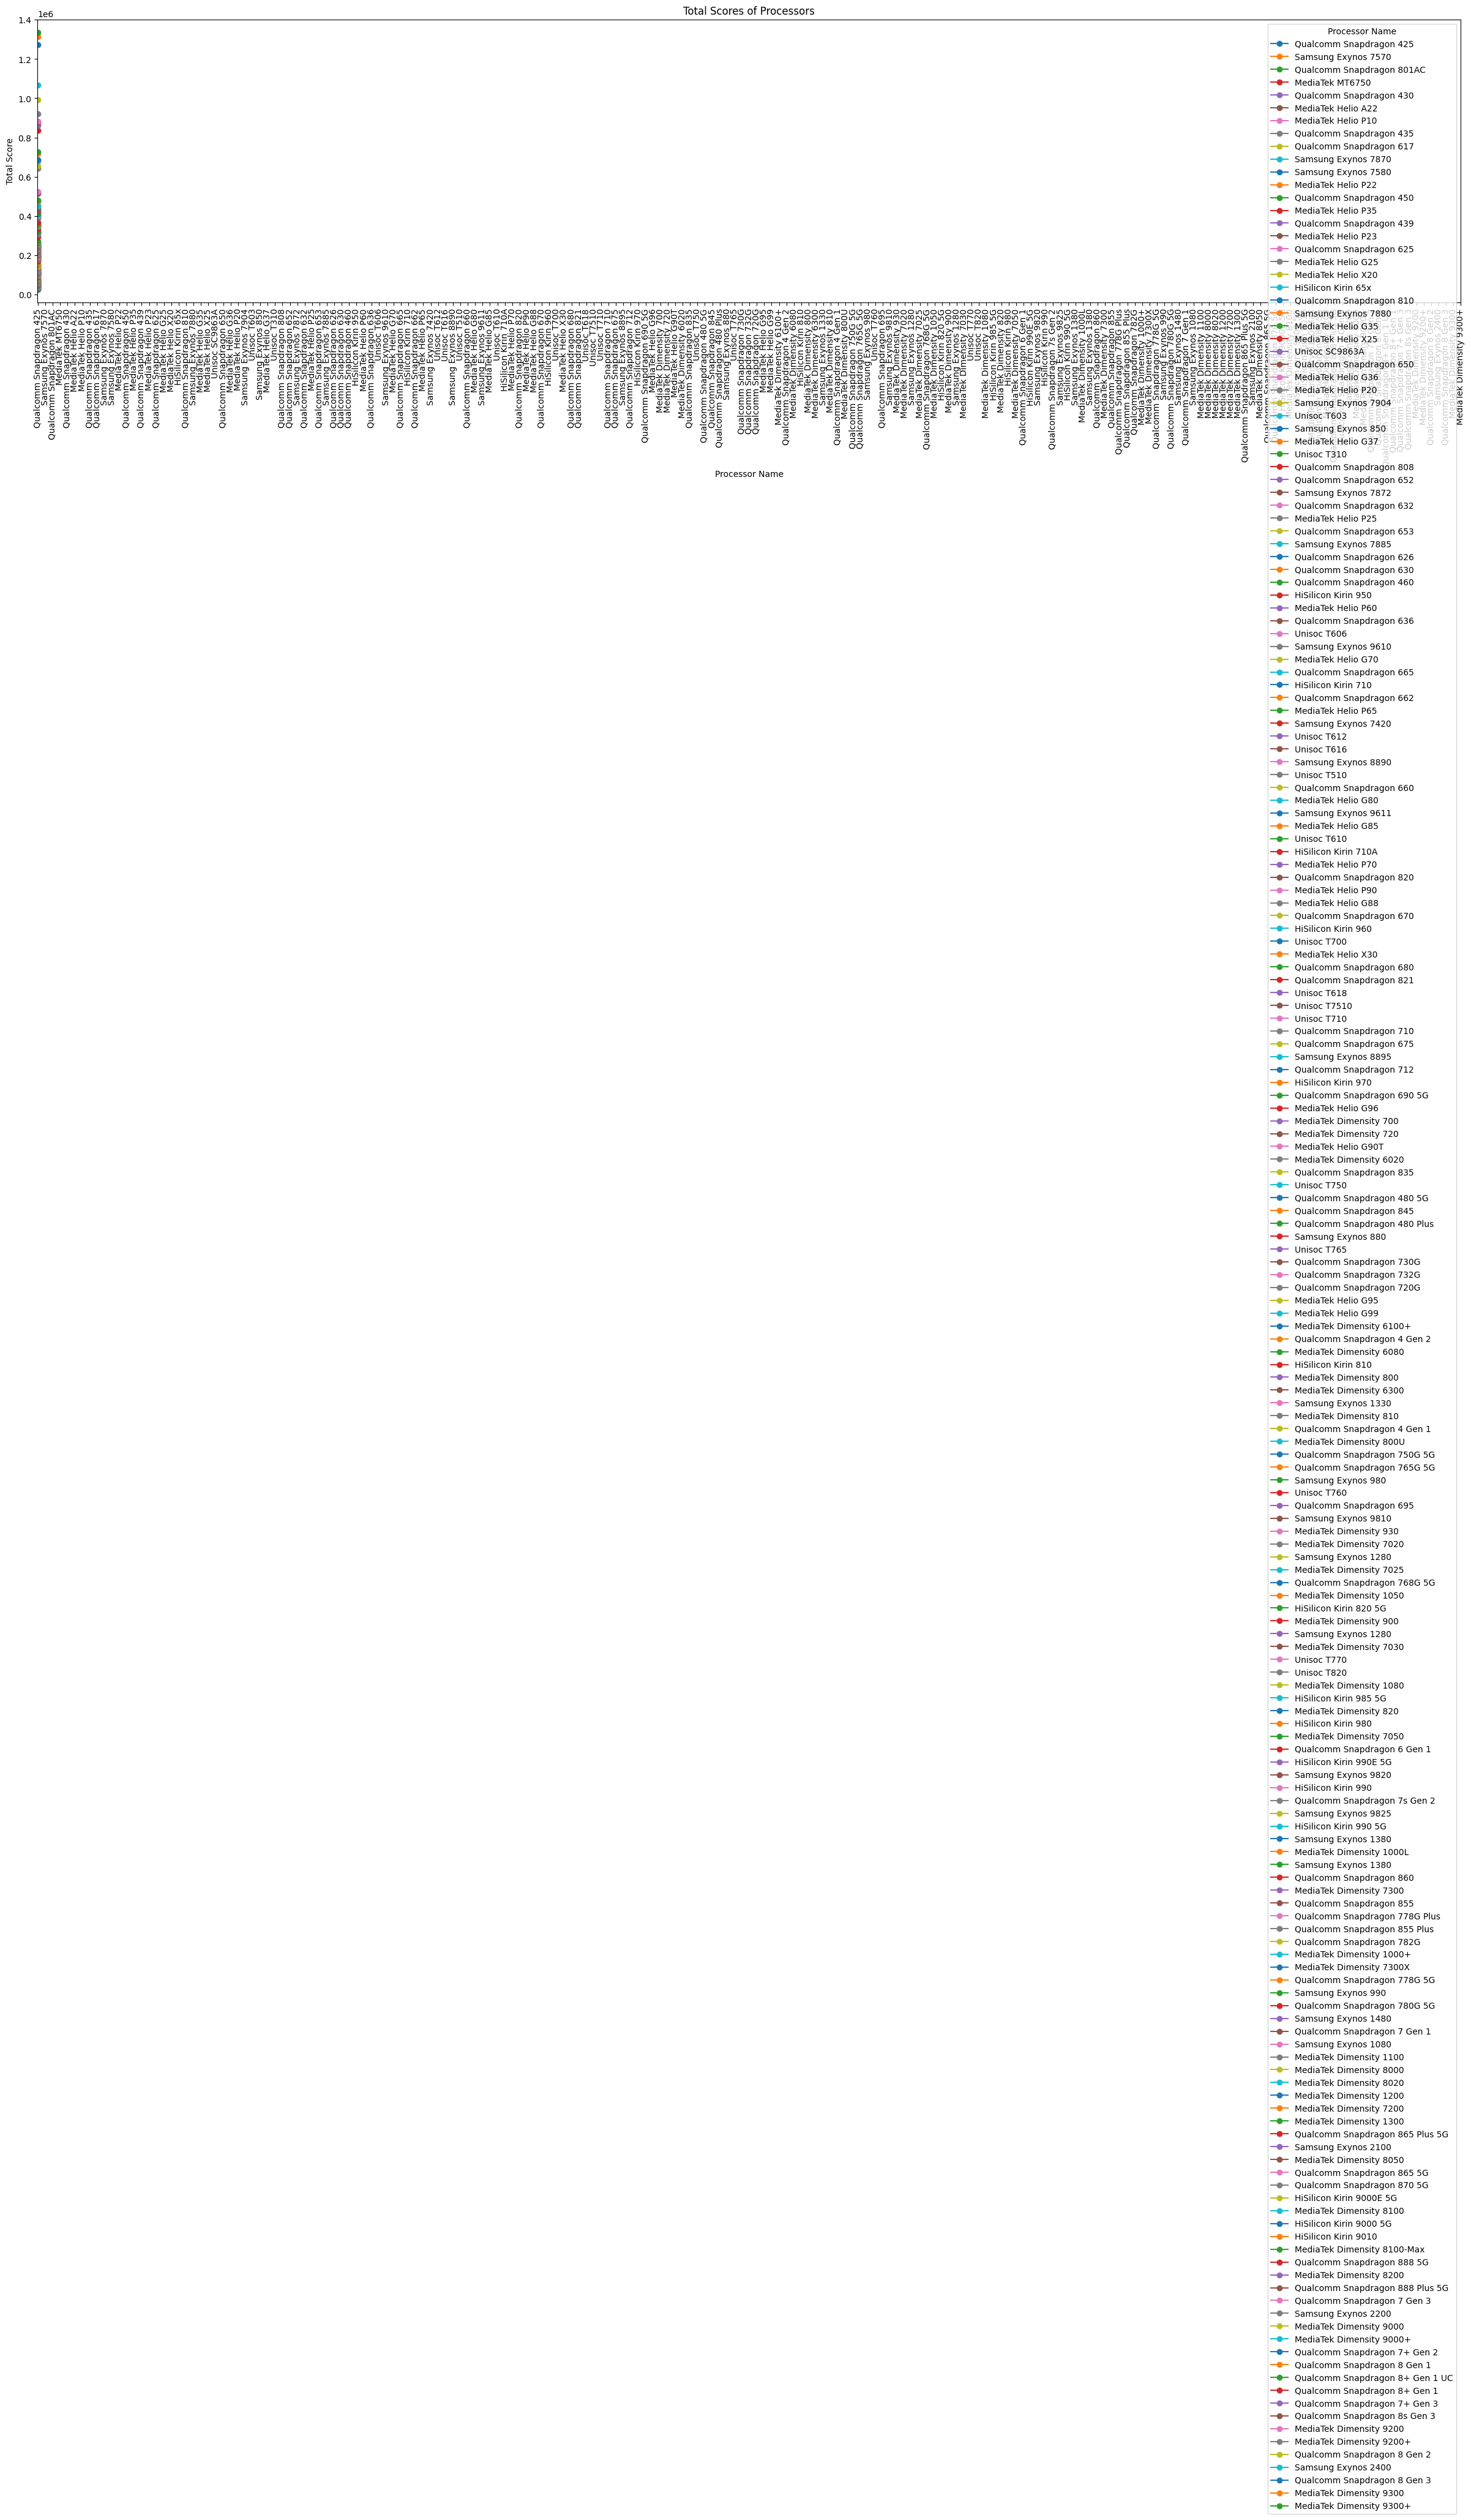

In [58]:
# Ensure the Total Score column is treated as numeric
df['Total Score'] = pd.to_numeric(df['Total Score'], errors='coerce')

# Drop rows with missing Total Score values
df = df.dropna(subset=['Total Score'])

# Sort the DataFrame by Total Score in ascending order
df_sorted = df.sort_values(by='Total Score')

# Plot the line chart
plt.figure(figsize=(30, 6))
for i, row in df_sorted.iterrows():
    plt.plot(row['Total Score'], marker='o', label=row['processor_name'])

# Set the chart title and labels
plt.title('Total Scores of Processors')
plt.xlabel('Processor Name')
plt.ylabel('Total Score')
plt.xticks(ticks=range(len(df_sorted)), labels=df_sorted['processor_name'], rotation=90)
plt.legend(title='Processor Name')

# Show the chart
plt.tight_layout()
plt.show()

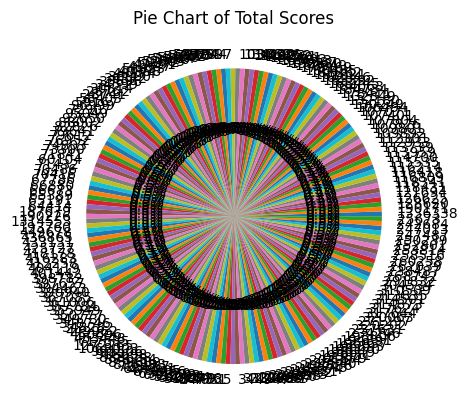

In [61]:
# If you have repeated values and want to show their proportion
df['Total Score'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Total Scores')
plt.ylabel('')
plt.show()

In [63]:
# Load the data from the Excel file
df = pd.read_excel("pro_info.xlsx")

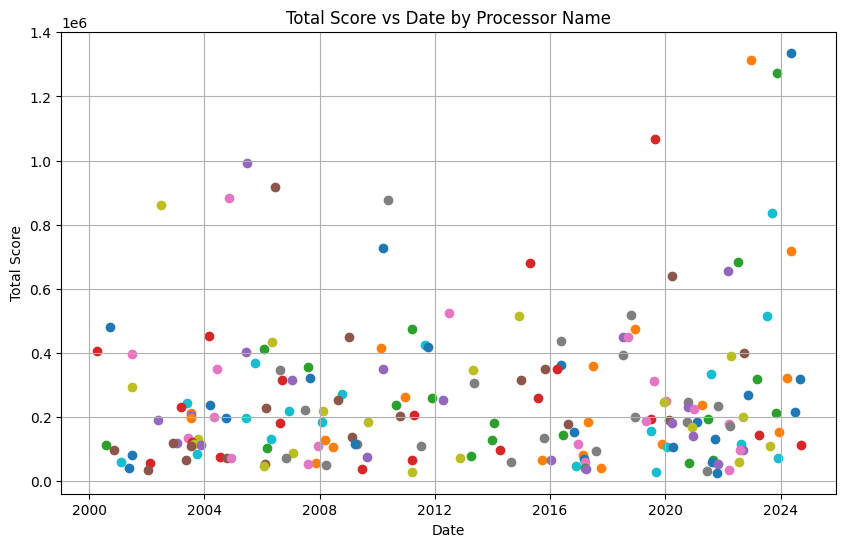

In [73]:
from datetime import datetime
import random
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# If you had missing dates, you would use this function
def fill_missing_dates(dates, start_date='01-01-2000', end_date='31-12-2024'):
    date_format = '%d-%m-%Y'
    start_date = datetime.strptime(start_date, date_format)
    end_date = datetime.strptime(end_date, date_format)
    random_dates = []
    
    for date in dates:
        if pd.isna(date):
            random_date = start_date + (end_date - start_date) * random.random()
            random_dates.append(random_date)
        else:
            random_dates.append(date)
            
    return random_dates

# Fill missing dates if there are any (not needed for your data but included for completeness)
df['Date'] = fill_missing_dates(df['Date'])

# Plotting
plt.figure(figsize=(10, 6))

for name in df['processor_name'].unique():
    subset = df[df['processor_name'] == name]
    plt.scatter(subset['Date'], subset['Total Score'], label=name)

plt.xlabel('Date')
plt.ylabel('Total Score')
plt.title('Total Score vs Date by Processor Name')
# plt.legend()
plt.grid(True)
plt.show()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SOC             193 non-null    object        
 1   CPU             193 non-null    int64         
 2   GPU             193 non-null    int64         
 3   Total Score     193 non-null    int64         
 4   processor_name  193 non-null    object        
 5   Date            3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 9.2+ KB
